In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
rb = pd.read_csv('../input/rb/dk_stats_loc.csv')
#week1_2018 = pd.read_csv('../input/rb/fantasy-football-weekly-projections (1).csv')
#week1_def = pd.read_csv('../input/defense_2018_projections.csv')

In [5]:
rb.tail()

,PlayerID,Name,Team,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,...,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsDraftKings,salary,def_rk,h/a,surface,year
5695,19541,Shane Smith,NYG,17,WAS,0,0,0.0,0,0,...,0,0,0,0,0.0,3500,16,away,grass,2017
5696,19548,Corey Clement,PHI,17,DAL,1,0,0.0,0,1,...,0,0,0,0,0.0,3000,3,home,grass,2017
5697,19562,Austin Ekeler,LAC,17,OAK,0,0,0.0,0,0,...,0,0,0,0,0.0,3000,19,away,grass,2017
5698,19599,Trey Edmunds,NO,17,TB,0,0,0.0,0,0,...,0,0,0,0,0.0,3600,31,away,grass,2017
5699,19626,Dare Ogunbowale,WAS,17,NYG,0,0,0.0,0,0,...,0,0,0,0,0.0,null,17,home,grass,2017


In [8]:
week1_2018.drop(['Rank','Position','FantasyPointsPerGame'], axis=1, inplace=True)

In [16]:
indices = []
for idx,player in enumerate(week1_2018['Player']):
    if player not in rb['Player'].unique():
        indices.append(idx)

indices

[1,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 15,
 17,
 18,
 20,
 21,
 27,
 28,
 29,
 32,
 34,
 43,
 44,
 45,
 46,
 52,
 53,
 54,
 59,
 62,
 63,
 64,
 65,
 68,
 69,
 72,
 74,
 77,
 78,
 79,
 81,
 84,
 87,
 88,
 90,
 91,
 92,
 94,
 98,
 99,
 100,
 102,
 104,
 106,
 107,
 108,
 114,
 117,
 119,
 122,
 123,
 125,
 126,
 129,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143]

In [19]:
week1_2018.drop(indices, axis=0, inplace=True)

week1_2018.reset_index(inplace=True, drop=True)

In [22]:
week1_def.index = week1_def['Team']
week1_def.drop('Team', axis=1, inplace=True)
week1_def.head()

,Rank,Name,Position,Played,TacklesForLoss,Sacks,QuarterbackHits,Interceptions,FumblesRecovered,Safeties,DefensiveTouchdowns,SpecialTeamsTouchdowns,PointsAllowed,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Team,,,,,,,,,,,,,,,
JAX,1,Jacksonville Jaguars,DST,16,103,49,113,18,14,0,4,1,268,8.1,129
LAC,2,Los Angeles Chargers,DST,16,93,44,85,17,13,0,4,2,272,7.9,127
LAR,3,Los Angeles Rams,DST,16,82,45,100,17,15,2,3,2,329,7.8,124
PHI,4,Philadelphia Eagles,DST,16,99,39,115,17,14,0,4,2,295,7.7,123
MIN,5,Minnesota Vikings,DST,16,82,42,85,17,12,1,3,1,252,7.0,112


In [24]:
week1_2018['def_ru_rk'] = list(map(lambda x: week1_def.loc[x]['Rank'], week1_2018['Opp']))
week1_2018['def_pass_rk'] = list(map(lambda x: week1_def.loc[x]['Rank'], week1_2018['Opp']))


In [9]:
for col in rb.columns:
    print(rb[col].describe(), '\n')

count             11748
unique              316
top       Anthony Dixon
freq                 94
Name: Player, dtype: object 

count     11748
unique       32
top         OAK
freq        461
Name: Team, dtype: object 

count    11748.000000
mean         8.952332
std          5.037556
min          1.000000
25%          4.000000
50%          9.000000
75%         13.000000
max         17.000000
Name: Week, dtype: float64 

count     11748
unique       32
top         PHI
freq        385
Name: Opp, dtype: object 

count    11748.000000
mean         5.889428
std          7.203717
min          0.000000
25%          0.000000
50%          3.000000
75%         10.000000
max         37.000000
Name: ru_att, dtype: float64 

count    11748.000000
mean        24.306435
std         34.737340
min        -14.000000
25%          0.000000
50%          8.000000
75%         37.000000
max        251.000000
Name: ru_yds, dtype: float64 

count    11748.000000
mean         2.592867
std          3.120888
min   

In [9]:
rb.columns

Index(['Player', 'Team', 'Week', 'Opp', 'ru_att', 'ru_yds', 'yds/att', 'td',
       'targets', 'Receptions', 'rec_yds', 'rec_td', 'Fumbles', 'FumblesLost',
       'points', 'year', 'def_ru_rk', 'def_pass_rk'],
      dtype='object')

In [14]:
week1_2018.columns

Index(['Player', 'Team', 'Week', 'Opp', 'ru_att', 'ru_yds', 'yds/att', 'td',
       'targets', 'Receptions', 'rec_yds', 'rec_td', 'Fumbles', 'FumblesLost',
       'points', 'year'],
      dtype='object')

In [13]:
week1_2018['year'] =2018
week1_2018.columns = rb.columns[:-2]

In [16]:
def boxplotter(data, column_name):
    fig= plt.figure(figsize=(6,4))

    ax = sns.boxplot(data[column_name], orient='v',
                    fliersize=8, linewidth=1.5, notch=False,
                    saturation=0.5)
    ax.set_title(column_name, fontsize=20)
    plt.show()

In [18]:
cols = ['ru_yds','ru_att','yds/att','td','targets','Receptions','rec_yds','rec_td','points']

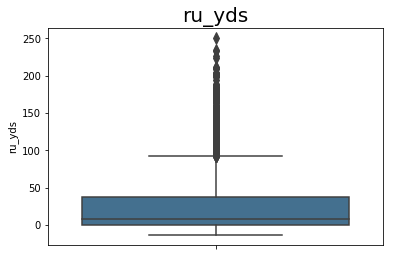

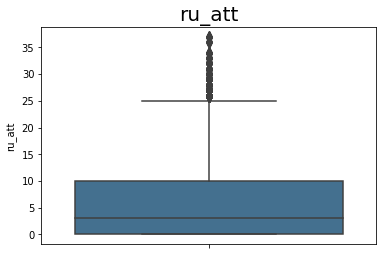

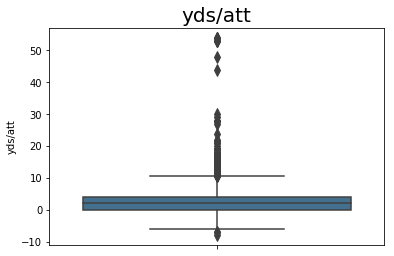

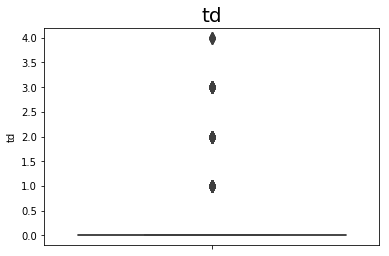

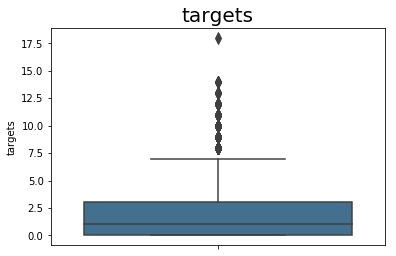

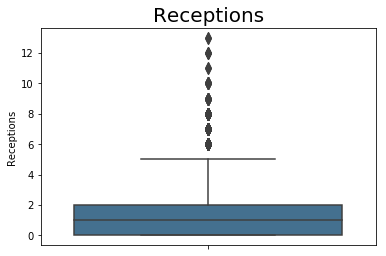

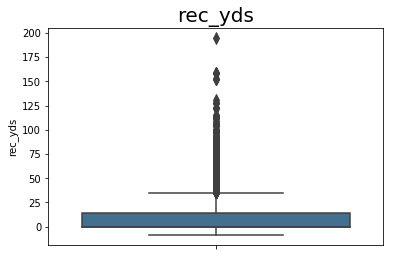

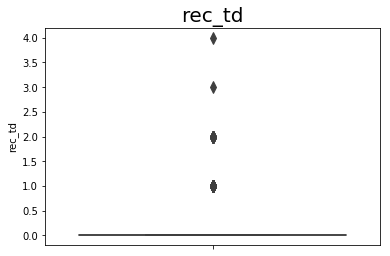

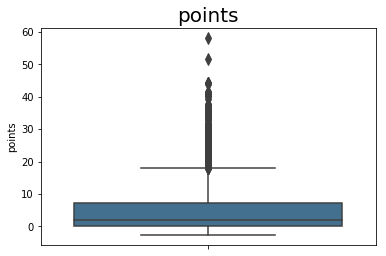

In [19]:
for col in cols:
    boxplotter(rb,col)

In [20]:
rb['ru_yds'].describe()

count    11748.000000
mean        24.306435
std         34.737340
min        -14.000000
25%          0.000000
50%          8.000000
75%         37.000000
max        251.000000
Name: ru_yds, dtype: float64

In [22]:
boxplotter(rb, np.l('ru_yds'))

NameError: name 'ln' is not defined

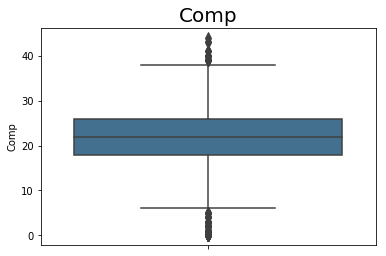

In [336]:
boxplotter(qb,'Comp')

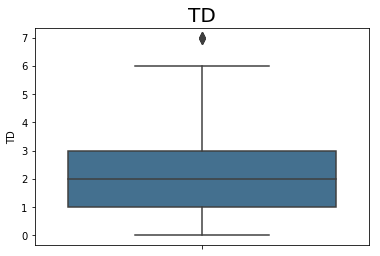

In [337]:
boxplotter(qb,'TD')

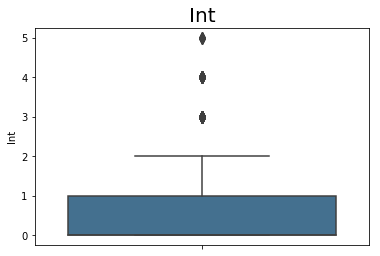

In [338]:
boxplotter(qb,'Int')

Text(0.5,1,'RB Stats')

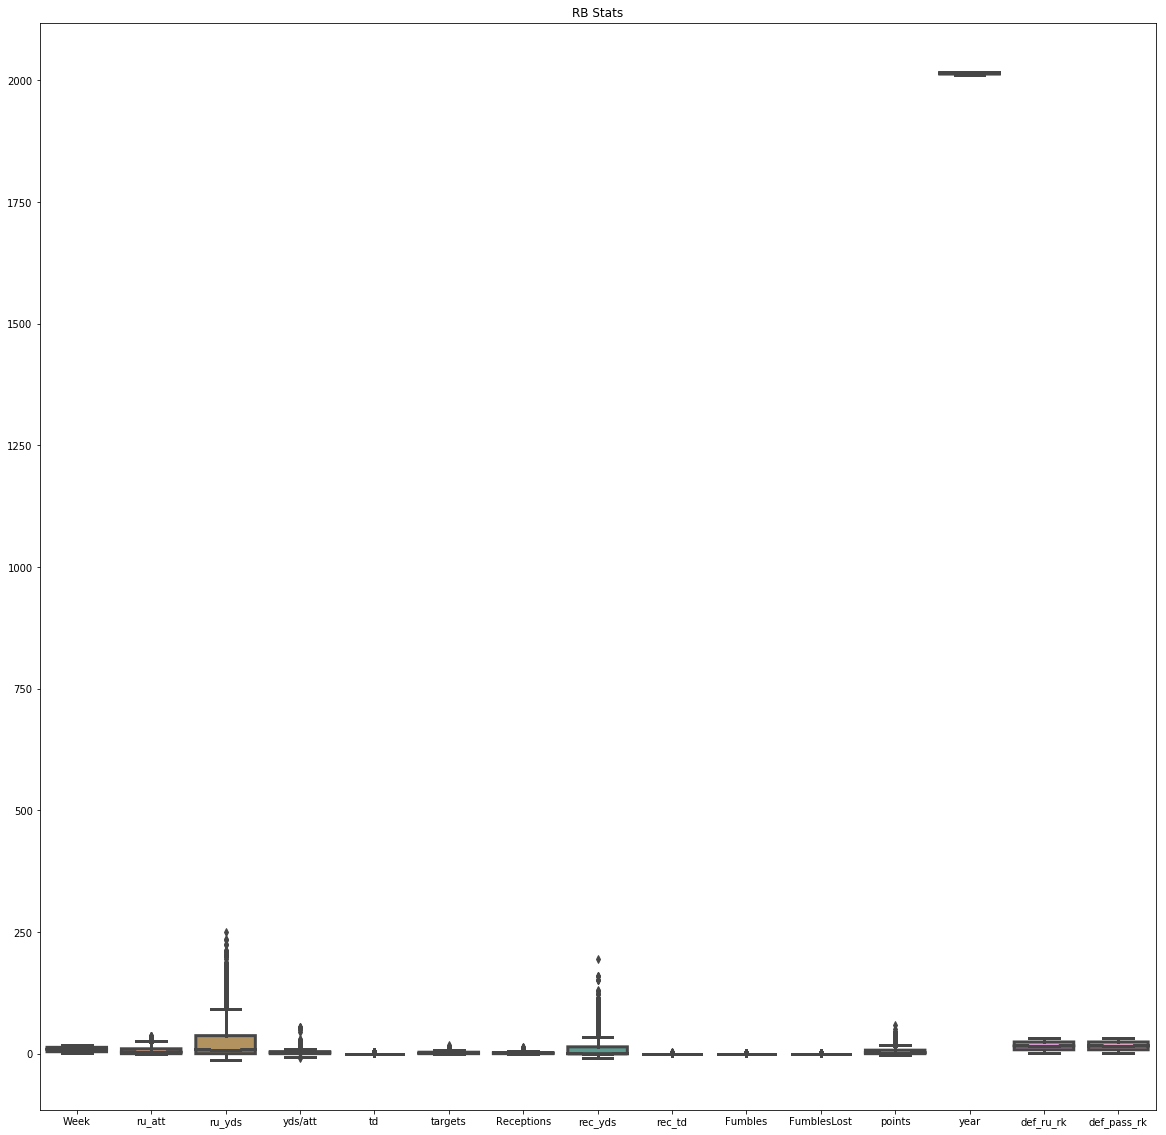

In [24]:
fig = plt.figure(figsize=(20,20))

ax = sns.boxplot(data=rb, orient='v', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5)

ax.set_title('RB Stats')

In [25]:
rb.corr()

,Week,ru_att,ru_yds,yds/att,td,targets,Receptions,rec_yds,rec_td,Fumbles,FumblesLost,points,year,def_ru_rk,def_pass_rk
Week,1.000000e+00,0.003010,0.007359,-0.004875,-0.002318,-8.431204e-07,-0.010299,-0.016032,0.000154,-0.003898,-0.011887,0.000057,0.014853,-0.001803,-0.001803
ru_att,3.009886e-03,1.000000,0.899538,0.401823,0.467409,4.077776e-01,0.381668,0.298583,0.086384,0.218665,0.178190,0.779881,0.007314,0.034677,0.034677
ru_yds,7.359134e-03,0.899538,1.000000,0.567452,0.499462,3.420590e-01,0.320810,0.253933,0.085008,0.200009,0.163147,0.837260,0.002319,0.045174,0.045174
yds/att,-4.874831e-03,0.401823,0.567452,1.000000,0.264593,2.393790e-01,0.229259,0.191213,0.054334,0.102549,0.080932,0.478092,0.018411,0.031125,0.031125
td,-2.318229e-03,0.467409,0.499462,0.264593,1.000000,1.496312e-01,0.149917,0.135855,0.027802,0.092620,0.059614,0.722055,0.001156,0.054807,0.054807
targets,-8.431204e-07,0.407778,0.342059,0.239379,0.149631,1.000000e+00,0.941870,0.794247,0.274669,0.137527,0.114291,0.536936,0.029597,-0.009595,-0.009595
Receptions,-1.029887e-02,0.381668,0.320810,0.229259,0.149917,9.418700e-01,1.000000,0.838840,0.293824,0.144010,0.122290,0.542549,0.028119,-0.010416,-0.010416
rec_yds,-1.603193e-02,0.298583,0.253933,0.191213,0.135855,7.942466e-01,0.838840,1.000000,0.343222,0.111920,0.102770,0.546928,0.029390,0.007477,0.007477
rec_td,1.543040e-04,0.086384,0.085008,0.054334,0.027802,2.746689e-01,0.293824,0.343222,1.000000,0.020783,0.013162,0.353509,0.031603,0.017967,0.017967
Fumbles,-3.897673e-03,0.218665,0.200009,0.102549,0.092620,1.375269e-01,0.144010,0.111920,0.020783,1.000000,0.768605,0.140720,-0.007175,-0.005018,-0.005018


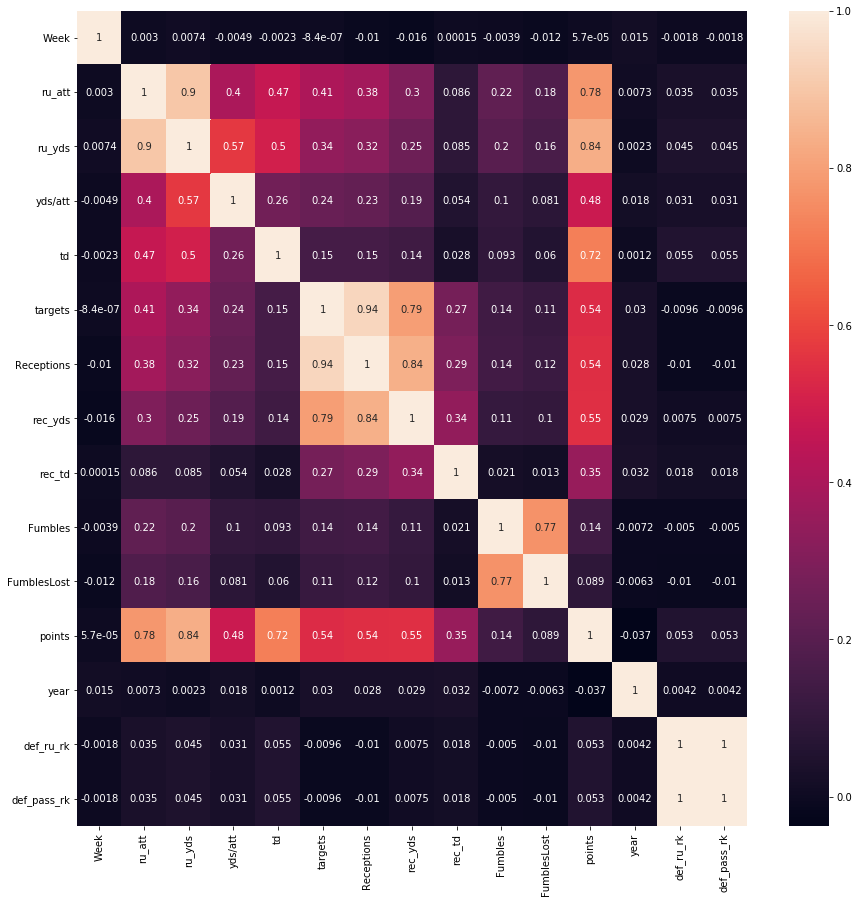

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(rb.corr(), annot=True)

In [28]:
corr = pd.DataFrame(index=rb.columns[4:])

In [31]:
rb.head()

,Player,Team,Week,Opp,ru_att,ru_yds,yds/att,td,targets,Receptions,rec_yds,rec_td,Fumbles,FumblesLost,points,year,def_ru_rk,def_pass_rk
0,CJ Spiller,BUF,1,NYJ,14,169,12.1,1,3,2,25,0,1,1,29.4,2012,20,20
1,Alfred Morris,WAS,1,NO,28,96,3.4,2,0,0,0,0,0,0,21.6,2012,31,31
2,Ray Rice,BAL,1,CIN,10,68,6.8,2,4,3,25,0,0,0,24.3,2012,8,8
3,Stevan Ridley,NE,1,TEN,21,125,6.0,1,3,2,27,0,0,0,26.2,2012,32,32
4,Kevin Smith,DET,1,LAR,13,62,4.8,1,6,4,29,1,0,0,25.1,2012,14,14


In [32]:
np.corrcoef(rb.points,)

1.0

In [114]:
corr

""
Comp
Att
Pct
Yds
Yds/Att
TD
Int
ru_att
ru_yds
yds/ru_att


In [36]:
coef =[]
for col in rb.columns[4:]:
    #print(qb[col])
    coef.append(np.corrcoef(rb.points,rb[col])[0][1])

In [37]:
corr[1] = coef

In [38]:
corr

,1
ru_att,0.779881
ru_yds,0.837260
yds/att,0.478092
td,0.722055
targets,0.536936
Receptions,0.542549
rec_yds,0.546928
rec_td,0.353509
Fumbles,0.140720
FumblesLost,0.088526


C:\Users\bobal\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


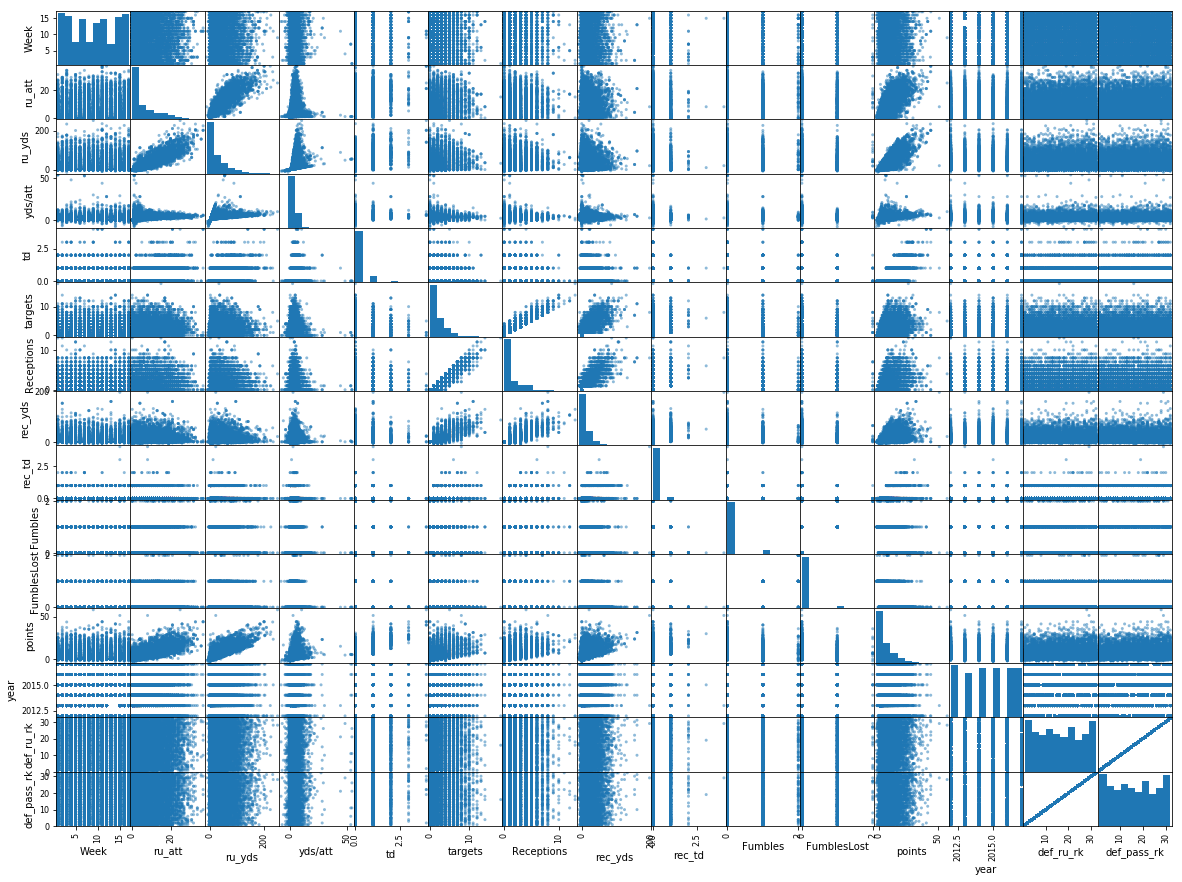

In [39]:
pd.scatter_matrix(rb[4:], figsize=(20,15))
plt.show()


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [26]:
#A function that will covert a time series database into a supervised learning database

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [27]:
train  = rb
test = week1_2018

In [29]:
train.shape

(11748, 18)

In [30]:
test.shape

(70, 18)

In [345]:
passing = ['Comp','Att','Pct','Yds','Yds/Att','TD','Int']

In [31]:
y_train = train['points']
y_test = test['points']
X_train = train.drop('points',axis=1)
X_test = test.drop('points', axis=1)

In [32]:
X_train = X_train[X_train.columns[4:]]
X_test = X_test[X_test.columns[4:]]

In [348]:

X_train = X_train[X_train.columns[4:11]]
X_test = X_test[X_test.columns[4:11]]

In [33]:
X_train.columns

Index(['ru_att', 'ru_yds', 'yds/att', 'td', 'targets', 'Receptions', 'rec_yds',
       'rec_td', 'Fumbles', 'FumblesLost', 'year', 'def_ru_rk', 'def_pass_rk'],
      dtype='object')

In [34]:
reframed = series_to_supervised(X_train.values.astype('float32'),1,1)

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
coeff = pd.DataFrame(X_train.columns)
coeff['coefficients'] = lr.coef_
coeff



,0,coefficients
0,ru_att,-0.016761
1,ru_yds,0.107790
2,yds/att,-0.020275
3,td,5.971200
4,targets,0.007460
5,Receptions,0.141891
6,rec_yds,0.100108
7,rec_td,5.822190
8,Fumbles,0.010859
9,FumblesLost,-1.777669


In [37]:
yhat = lr.predict(X_test)
yhat.shape

(70,)

In [51]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(yhat, y_test)
print("RMSE error is: " + str(rmse_val))

RMSE error is: 0.712465875151


In [38]:
results = pd.DataFrame()
results['Player'] = week1_2018['Player']
#results['score'] = y_test
results['Predicted'] = yhat
#results['Week'] = rb[rb['year']==2017]['Week']
#results.groupby('Player').mean()[['score','Predicted']]
results

,Player,Predicted
0,Todd Gurley,18.561469
1,David Johnson,17.240292
2,Melvin Gordon,14.514580
3,Devonta Freeman,11.331842
4,LeSean McCoy,10.591942
5,Lamar Miller,10.344359
6,Le'Veon Bell,9.925670
7,Jay Ajayi,9.253915
8,Rex Burkhead,9.192221
9,Marshawn Lynch,8.668046


In [39]:
results.shape

(70, 2)

In [40]:
results.to_csv('2018_week1_rb.csv', index= False)